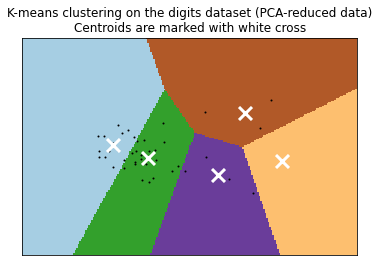

In [88]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pandas as pd


data_path = 'cross_cats.xls'
df_init = pd.read_excel(data_path)

data = df_init.drop(columns = 'Unnamed: 0')

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=3)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

In [51]:
df2 = pd.DataFrame(list(kmeans.labels_))
df2 = df2.rename(columns={0: "cluster_index"})


In [73]:
cats = df_init['Unnamed: 0']

In [74]:
df_final = pd.concat([cats, df2], sort=False, axis = 1)

In [75]:
df_final

,Unnamed: 0,cluster_index
0,General.Animals,0
1,General.Business,4
2,General.ConstructionRenovation,1
3,General.Electronics,3
4,General.Fashion,3
5,General.Food,0
6,General.Furniture,3
7,General.GoodsForBusiness,2
8,General.GoodsForChildren,0
9,General.GoodsForPets,4


In [76]:
res = df_final.groupby('cluster_index')['Unnamed: 0'].apply(list)

In [77]:
res[4]

['General.Business',
 'General.GoodsForPets',
 'Jobs.CVs',
 'Realty.Commercial',
 'Realty.NewDevelopments',
 'Realty.Other',
 'Services.EventsAndEntertainment',
 'Services.Other',
 'Services.Training',
 'Transport.CarRentals',
 'Transport.NewCars',
 'Transport.Water']